In [1]:
import sys
import time
import torch
import torch_fpsample
import matplotlib.pyplot as plt

sys.path.append('../..')
from fast_nystrom_attention import sample_landmarks

In [ ]:
# Time sampling landmarks with different sequence lengths using both FPS and random sampling
def time_sampling(seq_len, num_samples, hidden_size=4096, sample_method='fps', device='cpu'):
    x = torch.rand(2, seq_len, hidden_size, dtype=torch.float32, device=device)
    start_time = time.time()
    
    sample_indices = sample_landmarks(
        x, 
        num_samples, 
        sample_method=sample_method
    )
    
    elapsed_time = time.time() - start_time
    return elapsed_time

def time_sampling_torch_fpsample(seq_len, num_samples, hidden_size=4096):
    x = torch.rand(2, seq_len, hidden_size, dtype=torch.float32)
    start_time = time.time()
    
    sampled_points, indices = torch_fpsample.sample(x, num_samples, h=7)
    
    elapsed_time = time.time() - start_time
    return elapsed_time

# Define sequence lengths and number of samples
sequence_lengths = [400, 800, 1200, 1600, 2000, 2400, 2800, 3200, 3600, 4000]
num_samples = 256

# Measure time for FPS sampling
fps_times = []
for seq_len in sequence_lengths:
    elapsed_time = time_sampling(seq_len, num_samples, sample_method='fps')
    fps_times.append(elapsed_time)
    print(f"FPS sampling for seq_len={seq_len}: {elapsed_time:.4f} seconds")

# Measure time for FPS sampling on GPU
device = torch.device('cuda:1')
fps_gpu_times = []
for seq_len in sequence_lengths:
    elapsed_time = time_sampling(seq_len, num_samples, sample_method='fps', device=device)
    fps_gpu_times.append(elapsed_time)
    print(f"FPS sampling on GPU for seq_len={seq_len}: {elapsed_time:.4f} seconds")

# Measure time for random sampling
random_times = []
for seq_len in sequence_lengths:
    elapsed_time = time_sampling(seq_len, num_samples, sample_method='random')
    random_times.append(elapsed_time)
    print(f"Random sampling for seq_len={seq_len}: {elapsed_time:.4f} seconds")

# Measure time for torch_fpsample
torch_fpsample_times = []
for seq_len in sequence_lengths:
    elapsed_time = time_sampling_torch_fpsample(seq_len, num_samples)
    torch_fpsample_times.append(elapsed_time)
    print(f"torch_fpsample for seq_len={seq_len}: {elapsed_time:.4f} seconds")

FPS sampling for seq_len=400: 0.1641 seconds
FPS sampling for seq_len=800: 0.3729 seconds
FPS sampling for seq_len=1200: 0.6193 seconds
FPS sampling for seq_len=1600: 0.9416 seconds
FPS sampling for seq_len=2000: 1.4024 seconds
FPS sampling for seq_len=2400: 2.1875 seconds
FPS sampling for seq_len=2800: 2.9572 seconds
FPS sampling for seq_len=3200: 4.8700 seconds
FPS sampling for seq_len=3600: 5.9796 seconds
FPS sampling for seq_len=4000: 7.4570 seconds
FPS sampling on GPU for seq_len=400: 0.2936 seconds
FPS sampling on GPU for seq_len=800: 0.2208 seconds
FPS sampling on GPU for seq_len=1200: 0.3954 seconds
FPS sampling on GPU for seq_len=1600: 0.8374 seconds
FPS sampling on GPU for seq_len=2000: 1.1440 seconds
FPS sampling on GPU for seq_len=2400: 1.9988 seconds
FPS sampling on GPU for seq_len=2800: 2.6983 seconds
FPS sampling on GPU for seq_len=3200: 4.1132 seconds
FPS sampling on GPU for seq_len=3600: 5.0473 seconds
FPS sampling on GPU for seq_len=4000: 7.2669 seconds
Random samplin

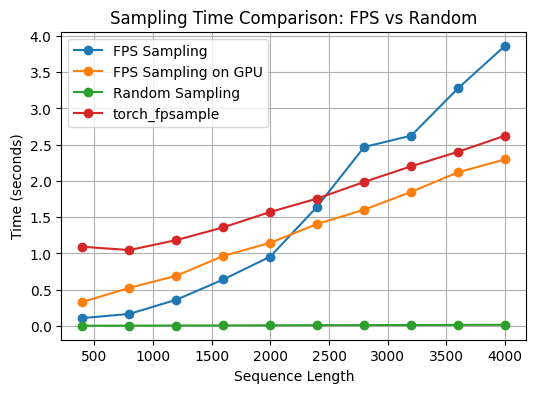

In [ ]:
# Graph the results
plt.figure(figsize=(6, 4))
plt.plot(sequence_lengths, fps_times, label='FPS Sampling', marker='o')
plt.plot(sequence_lengths, fps_gpu_times, label='FPS Sampling on GPU', marker='o')
plt.plot(sequence_lengths, random_times, label='Random Sampling', marker='o')
plt.plot(sequence_lengths, torch_fpsample_times, label='torch_fpsample', marker='o')
plt.xlabel('Sequence Length')
plt.ylabel('Time (seconds)')
plt.title('Sampling Time Comparison: FPS vs Random')
plt.legend()
plt.grid(True)
plt.show()

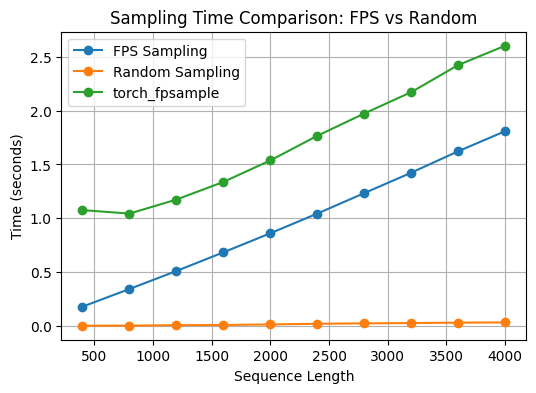

In [ ]:
# Graph the results
plt.figure(figsize=(6, 4))
plt.plot(sequence_lengths, fps_times, label='FPS Sampling', marker='o')
plt.plot(sequence_lengths, fps_gpu_times, label='FPS Sampling on GPU', marker='o')
plt.plot(sequence_lengths, random_times, label='Random Sampling', marker='o')
plt.plot(sequence_lengths, torch_fpsample_times, label='torch_fpsample', marker='o')
plt.xlabel('Sequence Length')
plt.ylabel('Time (seconds)')
plt.title('Sampling Time Comparison: FPS vs Random')
plt.legend()
plt.grid(True)
plt.show()